In [31]:
%reload_ext autoreload
%autoreload 2

# Gaussian eddy

We want to use a gaussian eddy for our functional tests, as an analytical solution exists in that setting.

The gaussian eddy we consider is of the form $\eta = \eta_0 \exp^{-(r/R_0)^2}$, with $R_0=50km$ its radius, and $\eta_0=10cm$ its SSH at its center. 
We choose a constant spatial step of $3km$.

In [32]:
R0 = 100e3
dxy = 3e3
ETA0 = -.25
LAT = -19

## Simulating the eddy

In [33]:
import numpy as np

from tests import *

X, Y, R, dXY, coriolis_factor, ssh, azim_geos, azim_cyclo = simulate_gaussian_eddy(R0, dxy, ETA0, LAT)

/home/bertrava/projects/jaxparrow/tests/tests.py:33: RuntimeWarning: invalid value encountered in divide
  azim_cyclo = 2 * azim_geos / (1 + np.sqrt(1 + 4 * azim_geos / (coriolis_factor * R)))


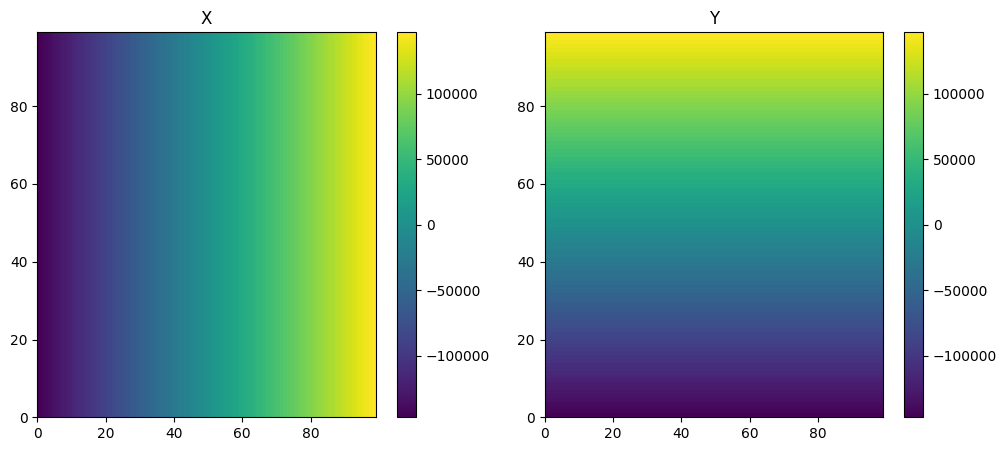

In [34]:
import matplotlib.pyplot as plt

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("X")
im = ax1.pcolormesh(X, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("Y")
im = ax2.pcolormesh(Y, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

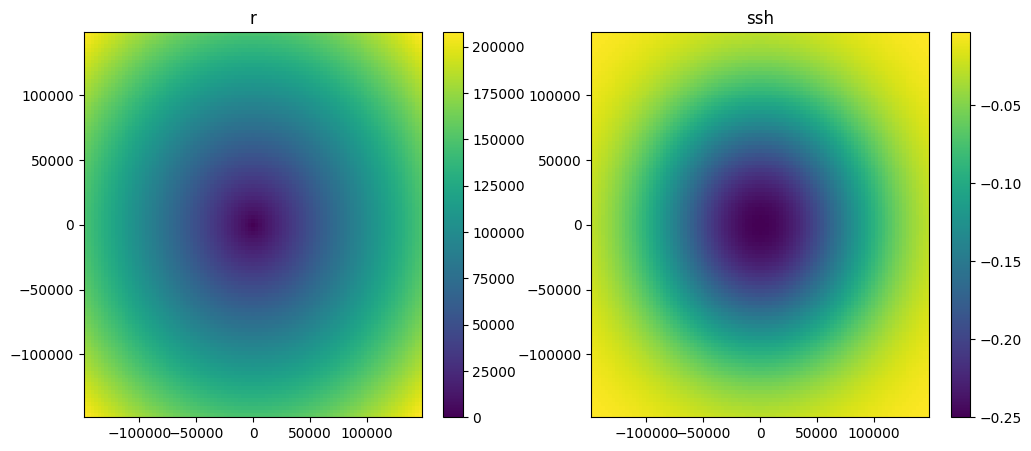

In [35]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("r")
im = ax1.pcolormesh(X, Y, R, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("ssh")
im = ax2.pcolormesh(X, Y, ssh, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

## Geostrophic azimuthal velocity

### Simulated

$V_g = (-)\frac{g \eta_0}{f R_0} \frac{r}{R_0} \exp^{-(r/R_0)^2}$

In [36]:
azim_geos_magn = np.abs(azim_geos)

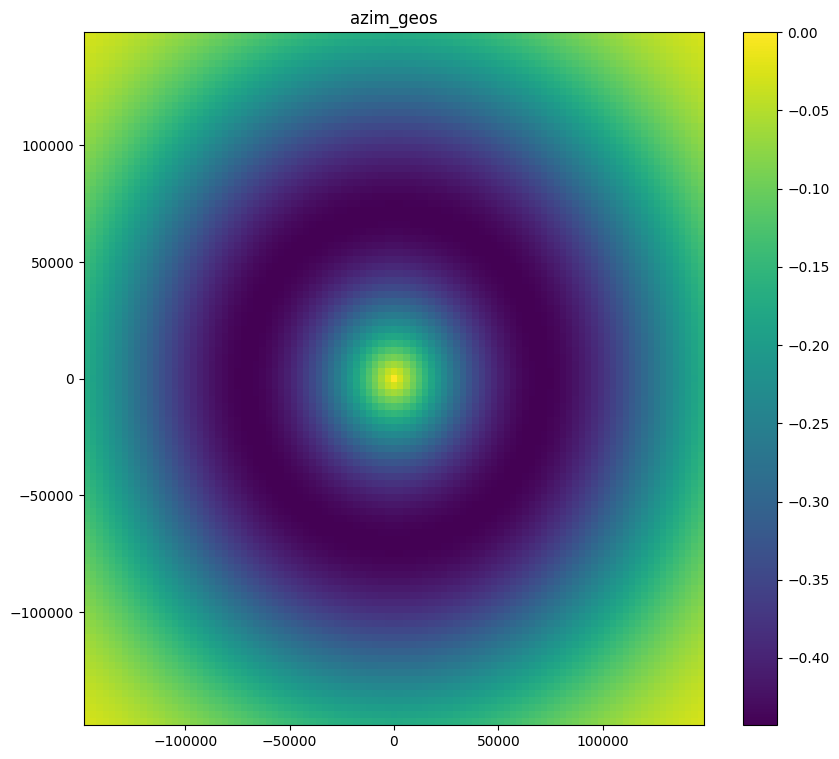

In [37]:
_, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_title("azim_geos")
im = ax.pcolormesh(X, Y, azim_geos, shading="auto")
plt.colorbar(im, ax=ax)
plt.show()

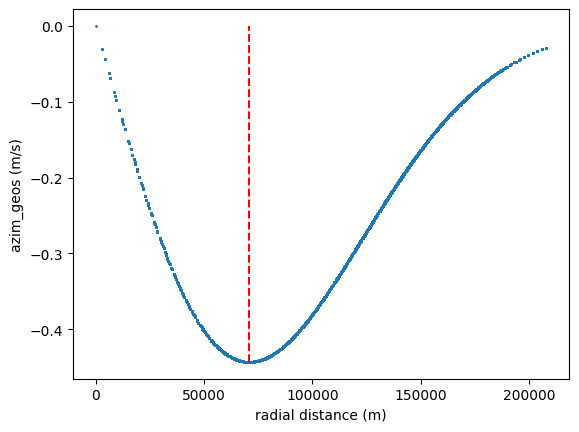

In [38]:
ax = plt.subplot()
ax.set_xlabel("radial distance (m)")
ax.set_ylabel("azim_geos (m/s)")
ax.scatter(R.flatten(), azim_geos.flatten(), s=1)
ax.vlines(R.flatten()[np.abs(azim_geos).flatten().argmax()], 
          ymin=azim_geos.min(), ymax=azim_geos.max(), colors="r", linestyles="dashed")
plt.show()

### Geostrophic balance

$f\mathbf{k} \times \mathbf{u_g} = -g \nabla \eta$

In [39]:
u_geos, v_geos = geos.geostrophy(ssh, dXY, dXY, coriolis_factor, coriolis_factor)

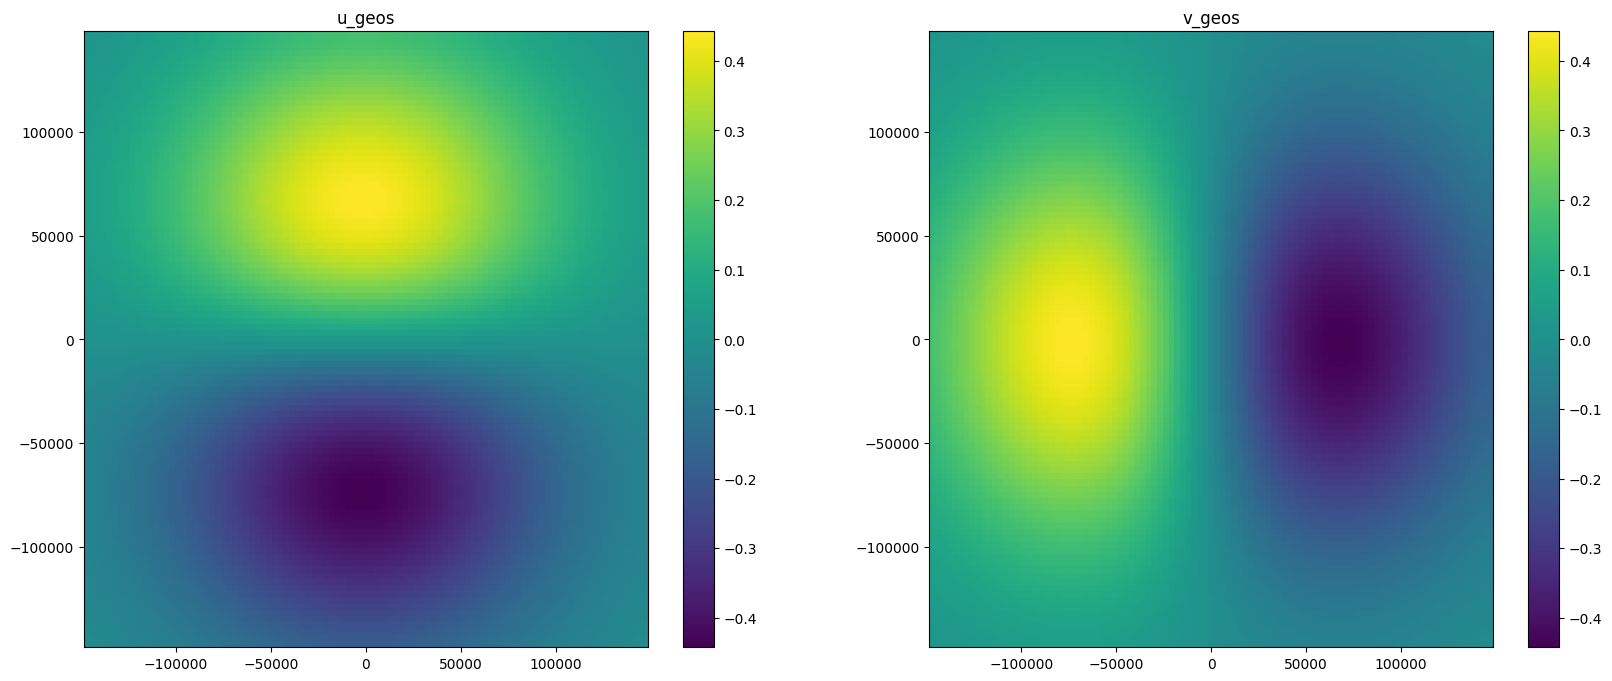

In [40]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title("u_geos")
im = ax1.pcolormesh(X, Y, u_geos, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("v_geos")
im = ax2.pcolormesh(X, Y, v_geos, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

In [41]:
u_geos_centered, v_geos_centered = reinterpolate(u_geos, axis=0), reinterpolate(v_geos, axis=1)
azim_geos_est = compute_azimuthal_magnitude(u_geos_centered, v_geos_centered)

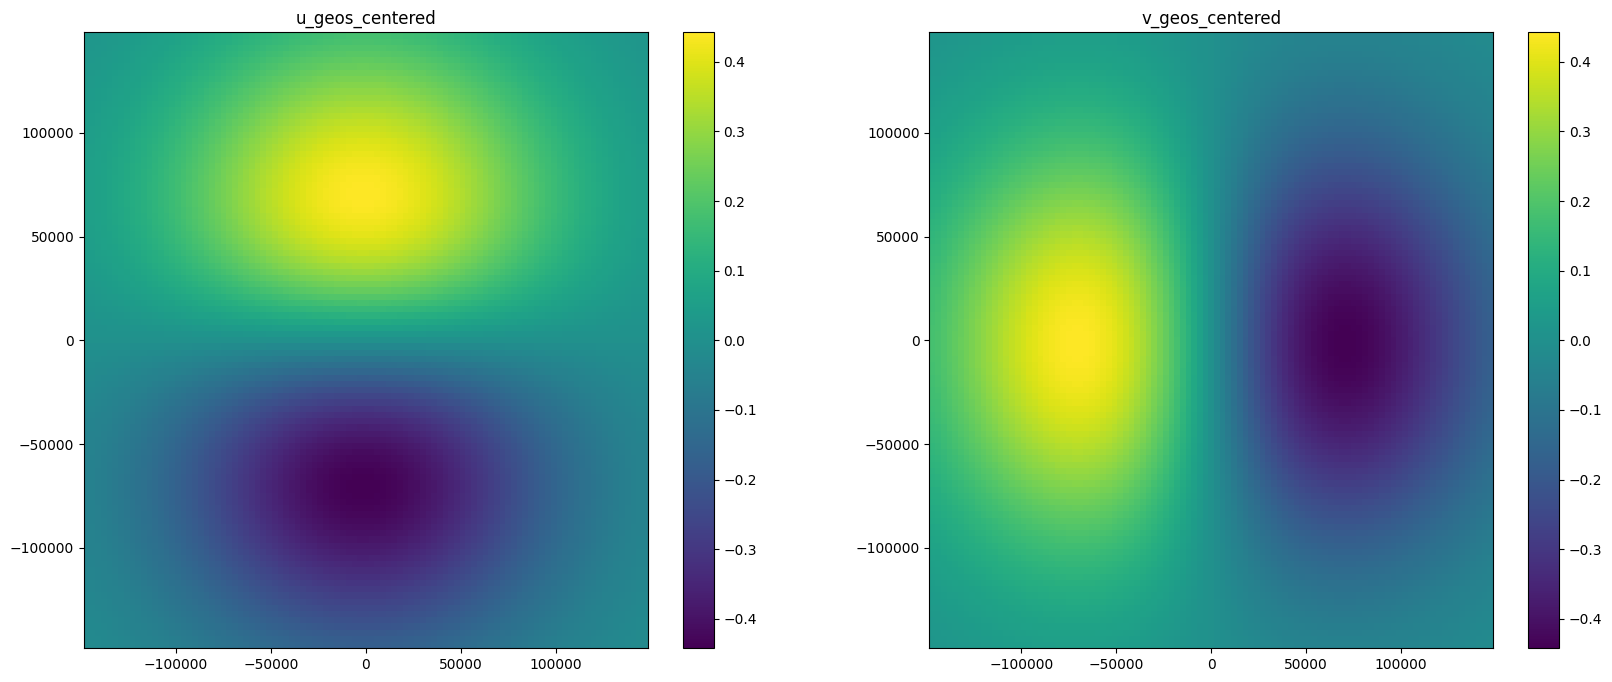

In [42]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title("u_geos_centered")
im = ax1.pcolormesh(X, Y, u_geos_centered, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("v_geos_centered")
im = ax2.pcolormesh(X, Y, v_geos_centered, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

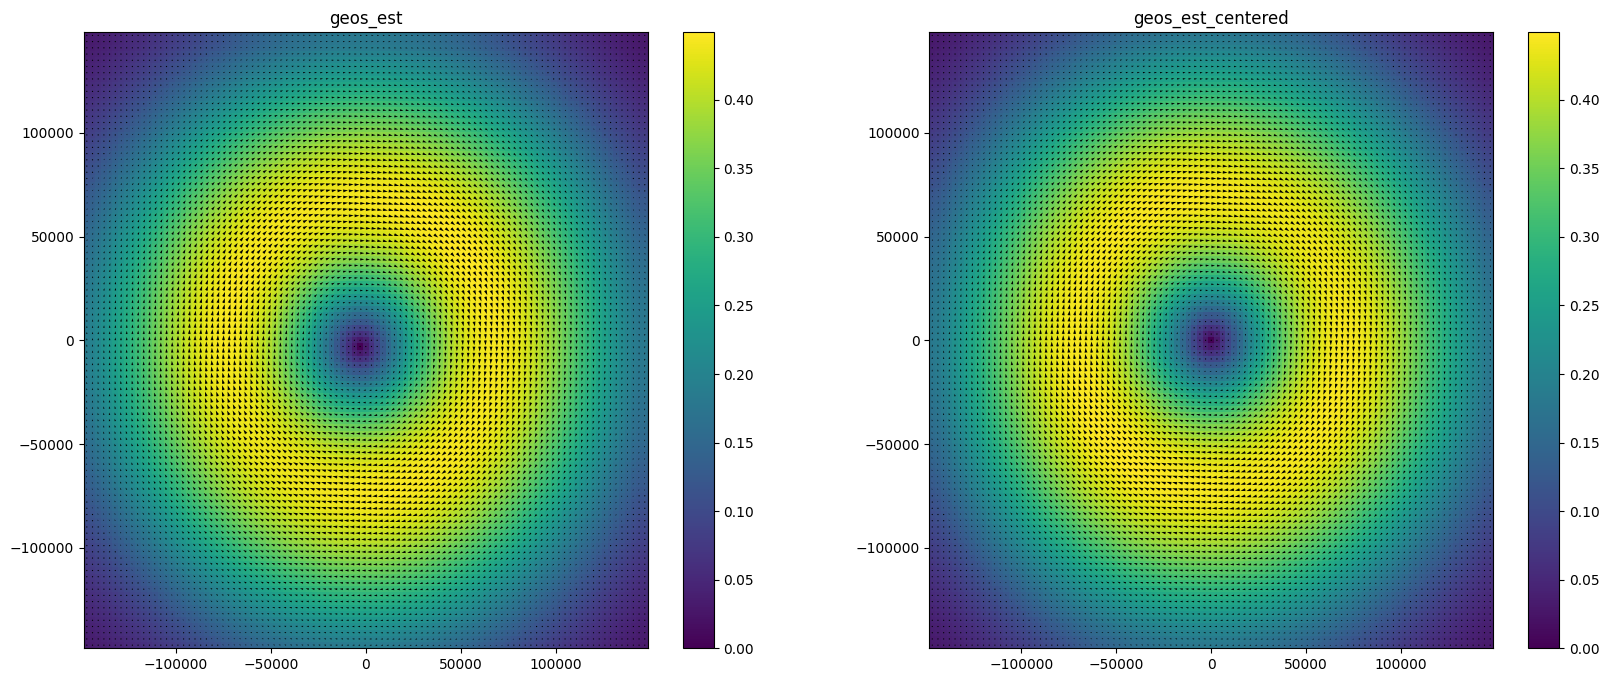

In [43]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title("geos_est")
im = ax1.pcolormesh(X, Y, compute_azimuthal_magnitude(u_geos, v_geos), shading="auto")
plt.colorbar(im, ax=ax1)
ax1.quiver(X, Y, u_geos, v_geos, color='k')
ax2.set_title("geos_est_centered")
im = ax2.pcolormesh(X, Y, azim_geos_est, shading="auto")
plt.colorbar(im, ax=ax2)
ax2.quiver(X, Y, u_geos_centered, v_geos_centered, color='k')
plt.show()

In [44]:
np.std(azim_geos_magn), compute_rmse(azim_geos_magn, azim_geos_est), compute_mape(azim_geos_magn, azim_geos_est), compute_cor(azim_geos_magn, azim_geos_est)

(0.12016635381789402,
 0.003280582425229152,
 0.011215017673637744,
 0.999630048655161)

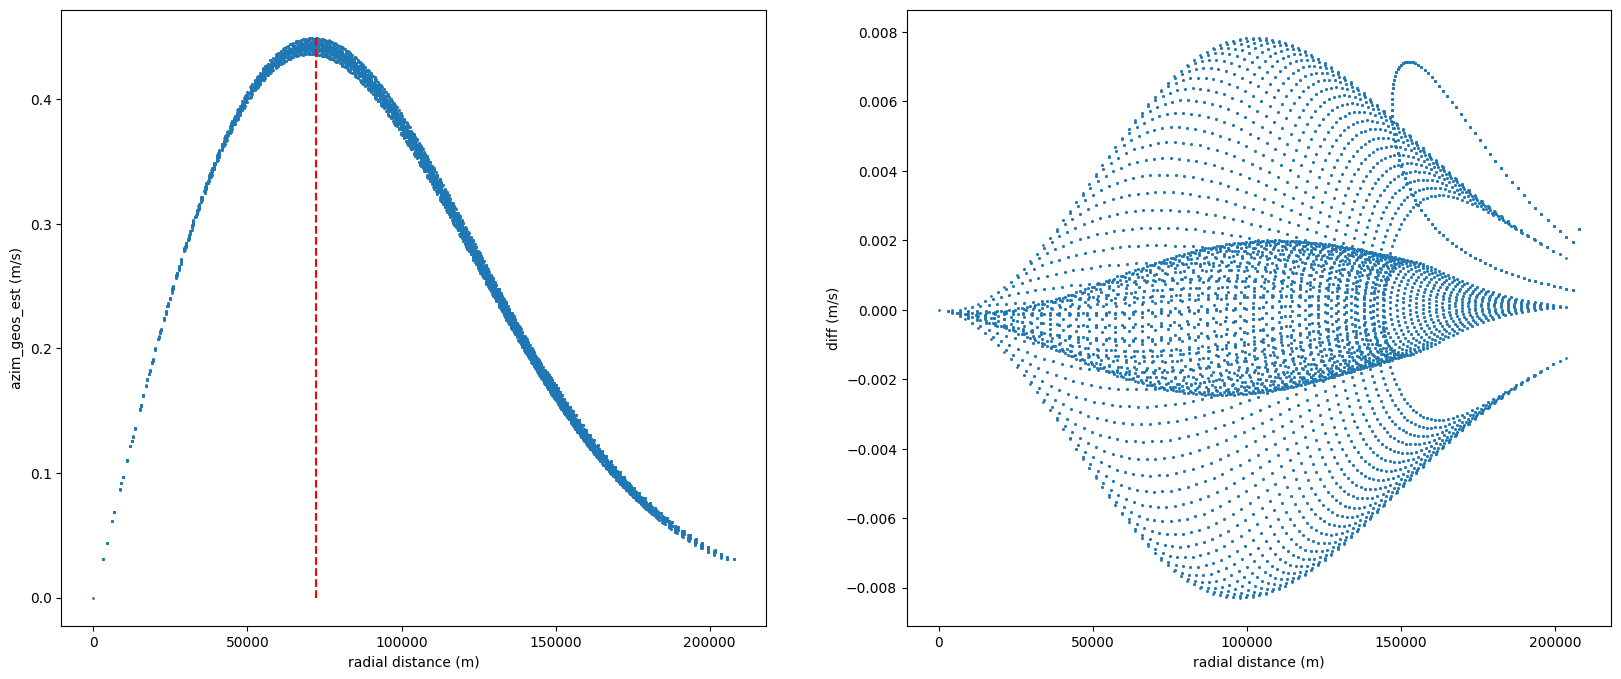

In [45]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_xlabel("radial distance (m)")
ax1.set_ylabel("azim_geos_est (m/s)")
ax1.scatter(R.flatten(), azim_geos_est.flatten(), s=1)
ax1.vlines(R.flatten()[np.abs(azim_geos_est).flatten().argmax()], 
           ymin=azim_geos_est.min(), ymax=azim_geos_est.max(), colors="r", linestyles="dashed")
ax2.set_xlabel("radial distance (m)")
ax2.set_ylabel("diff (m/s)")
ax2.scatter(R.flatten(), (azim_geos_est - azim_geos_magn).flatten(), s=1)
plt.show()

## Cyclogeostrophic azimuthal velocity

### Gradient wind analytical solution

$V_{gr}=\frac{2V_g}{1+\sqrt{1+4V_g/(fr)}}$

In [46]:
azim_cyclo_magn = np.abs(azim_cyclo)

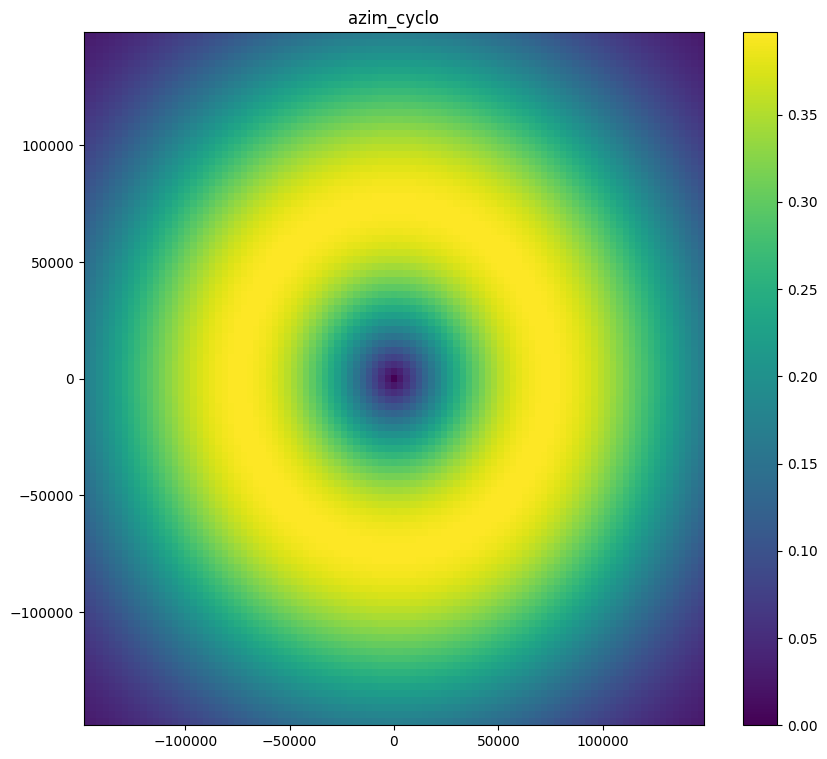

In [47]:
_, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_title("azim_cyclo")
im = ax.pcolormesh(X, Y, azim_cyclo_magn, shading="auto")
plt.colorbar(im, ax=ax)
plt.show()

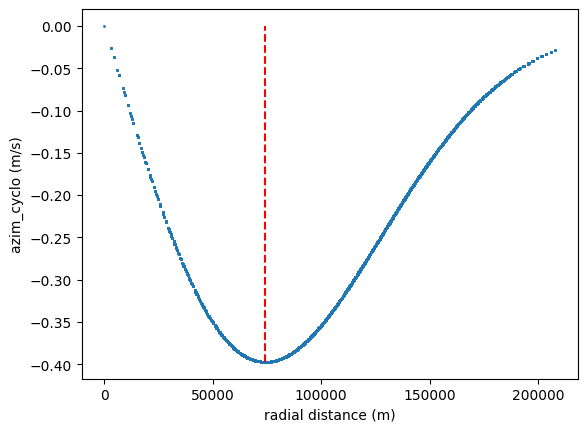

In [48]:
ax = plt.subplot()
ax.set_xlabel("radial distance (m)")
ax.set_ylabel("azim_cyclo (m/s)")
ax.scatter(R.flatten(), azim_cyclo.flatten(), s=1)
ax.vlines(R.flatten()[np.abs(azim_cyclo).flatten().argmax()], 
          ymin=azim_cyclo.min(), ymax=azim_cyclo.max(), colors="r", linestyles="dashed")
plt.show()

### Variational estimation

$\mathbf{u} - \frac{\mathbf{k}}{f} \times (\mathbf{u} \cdot \nabla \mathbf{u}) = \mathbf{u_g}$

In [49]:
u_cyclo, v_cyclo = cyclo.variational(u_geos_centered, v_geos_centered, dXY, dXY, dXY, dXY, coriolis_factor, coriolis_factor)

100%|██████████| 2000/2000 [00:01<00:00, 1285.53it/s]


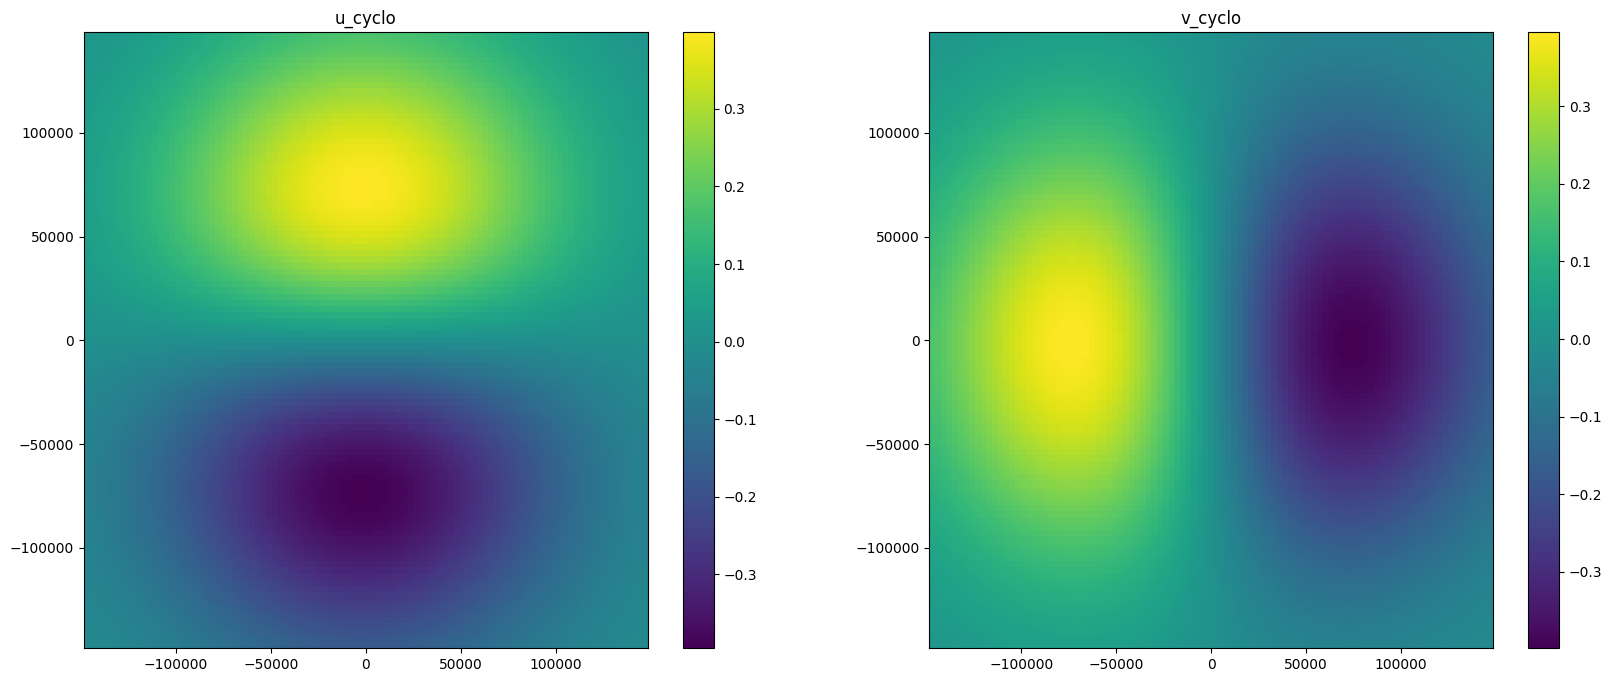

In [50]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title("u_cyclo")
im = ax1.pcolormesh(X, Y, u_cyclo, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("v_cyclo")
im = ax2.pcolormesh(X, Y, v_cyclo, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

In [51]:
azim_cyclo_est = compute_azimuthal_magnitude(u_cyclo, v_cyclo)

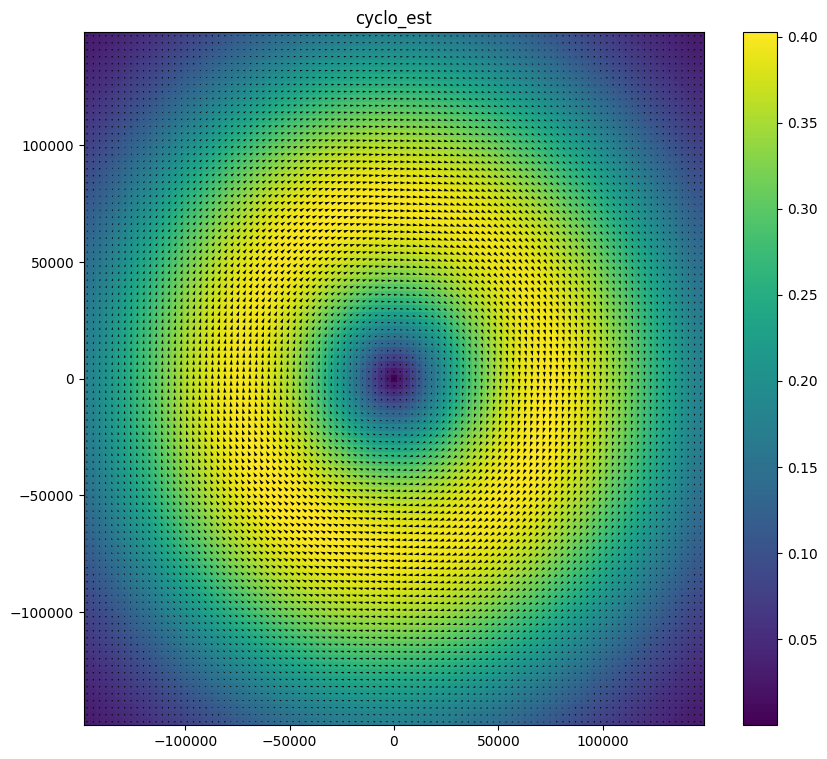

In [52]:
_, ax1 = plt.subplots(1, 1, figsize=(10, 9))
ax1.set_title("cyclo_est")
im = ax1.pcolormesh(X, Y, azim_cyclo_est, shading="auto")
plt.colorbar(im, ax=ax1)
ax1.quiver(X, Y, u_cyclo, v_cyclo, color='k')
ax2.set_title("cyclo_est_centered")
plt.show()

In [53]:
np.std(azim_cyclo_magn), compute_rmse(azim_cyclo_magn, azim_cyclo_est), compute_mape(azim_cyclo_magn, azim_cyclo_est), compute_cor(azim_cyclo_magn, azim_cyclo_est)

(0.10524995557075009,
 0.002944610340097881,
 0.011285232902625536,
 0.9996110810531329)

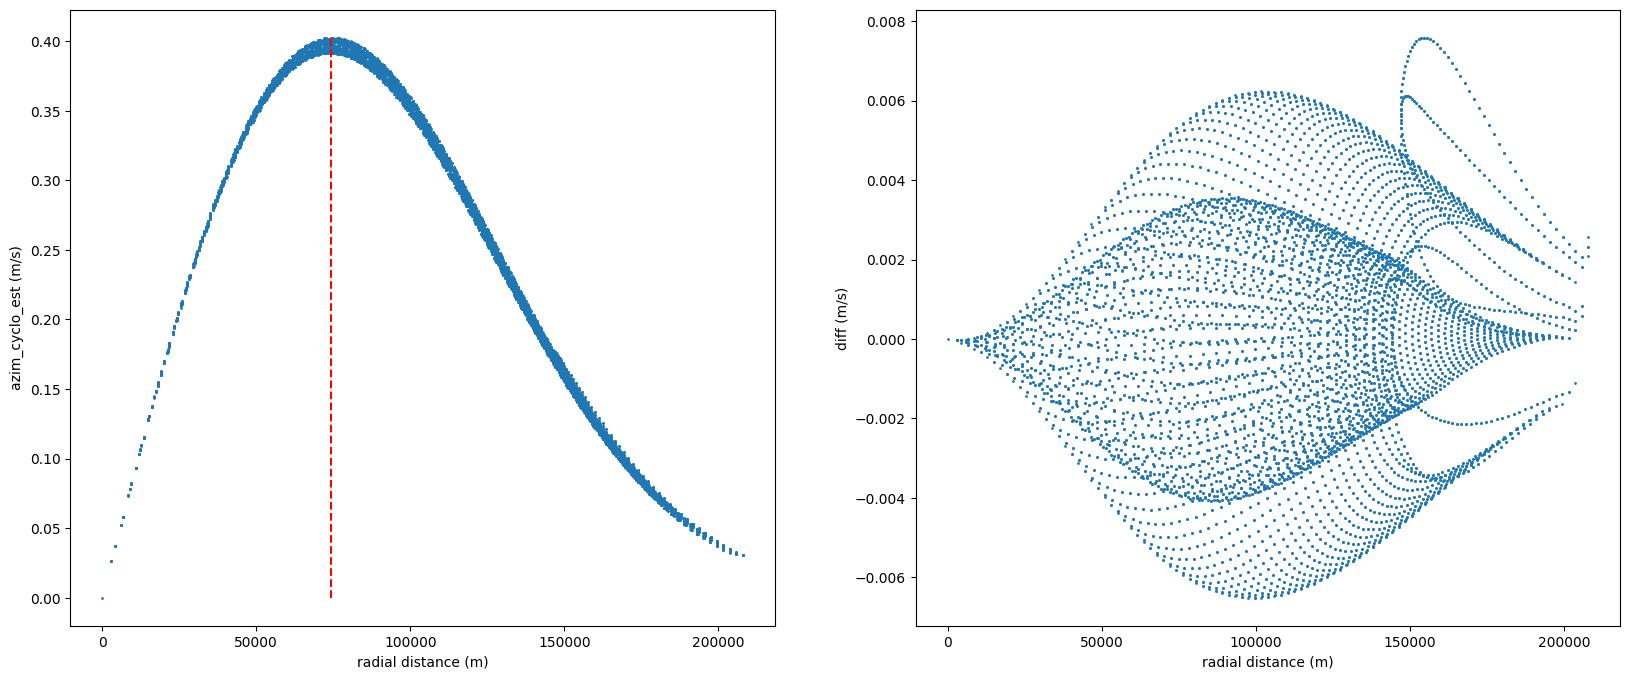

In [54]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_xlabel("radial distance (m)")
ax1.set_ylabel("azim_cyclo_est (m/s)")
ax1.scatter(R.flatten(), azim_cyclo_est.flatten(), s=1)
ax1.vlines(R.flatten()[np.abs(azim_cyclo_est).flatten().argmax()], 
           ymin=azim_cyclo_est.min(), ymax=azim_cyclo_est.max(), colors="r", linestyles="dashed")
ax2.set_xlabel("radial distance (m)")
ax2.set_ylabel("diff (m/s)")
ax2.scatter(R.flatten(), (azim_cyclo_est - azim_cyclo_magn).flatten(), s=1)
plt.show()

### Iterative estimation

$\mathbf{u}^{(n+1)} = \mathbf{u_g} + \frac{\mathbf{k}}{f} \times (\mathbf{u}^{(n)} \cdot \nabla \mathbf{u})^{(n)}$

In [55]:
u_cyclo, v_cyclo = cyclo.iterative(u_geos_centered, v_geos_centered, dXY, dXY, dXY, dXY, coriolis_factor, coriolis_factor)

  2%|▏         | 2/100 [00:00<00:00, 916.49it/s]


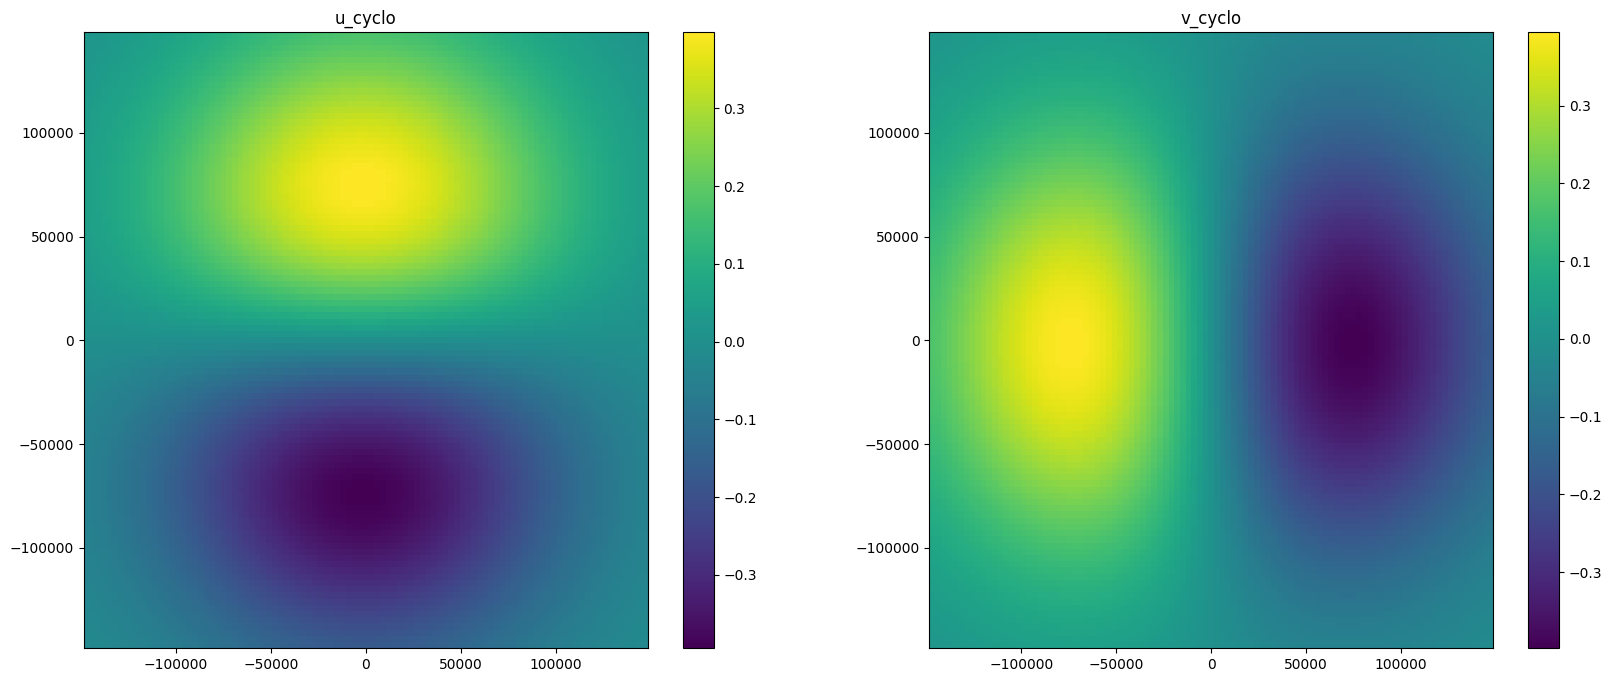

In [56]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title("u_cyclo")
im = ax1.pcolormesh(X, Y, u_cyclo, shading="auto")
plt.colorbar(im, ax=ax1)
ax2.set_title("v_cyclo")
im = ax2.pcolormesh(X, Y, v_cyclo, shading="auto")
plt.colorbar(im, ax=ax2)
plt.show()

In [57]:
azim_cyclo_est = compute_azimuthal_magnitude(u_cyclo, v_cyclo)

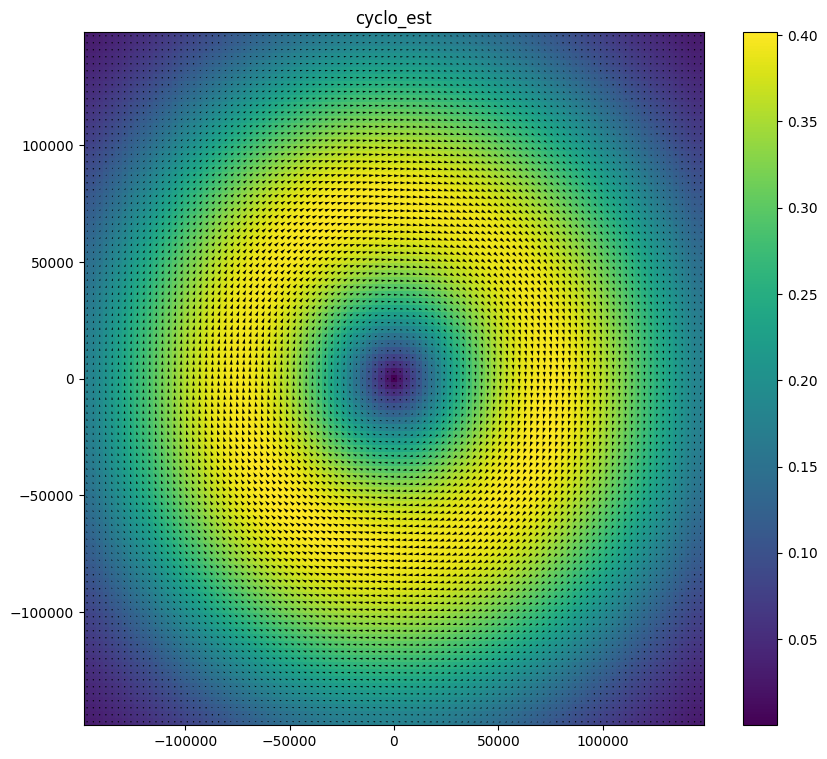

In [58]:
_, ax1 = plt.subplots(1, 1, figsize=(10, 9))
ax1.set_title("cyclo_est")
im = ax1.pcolormesh(X, Y, azim_cyclo_est, shading="auto")
plt.colorbar(im, ax=ax1)
ax1.quiver(X, Y, u_cyclo, v_cyclo, color='k')
ax2.set_title("cyclo_est_centered")
plt.show()

In [59]:
np.std(azim_cyclo_magn), compute_rmse(azim_cyclo_magn, azim_cyclo_est), compute_mape(azim_cyclo_magn, azim_cyclo_est), compute_cor(azim_cyclo_magn, azim_cyclo_est)

(0.10524995557075009,
 0.003023370508762567,
 0.011754008045364575,
 0.9995892378088834)

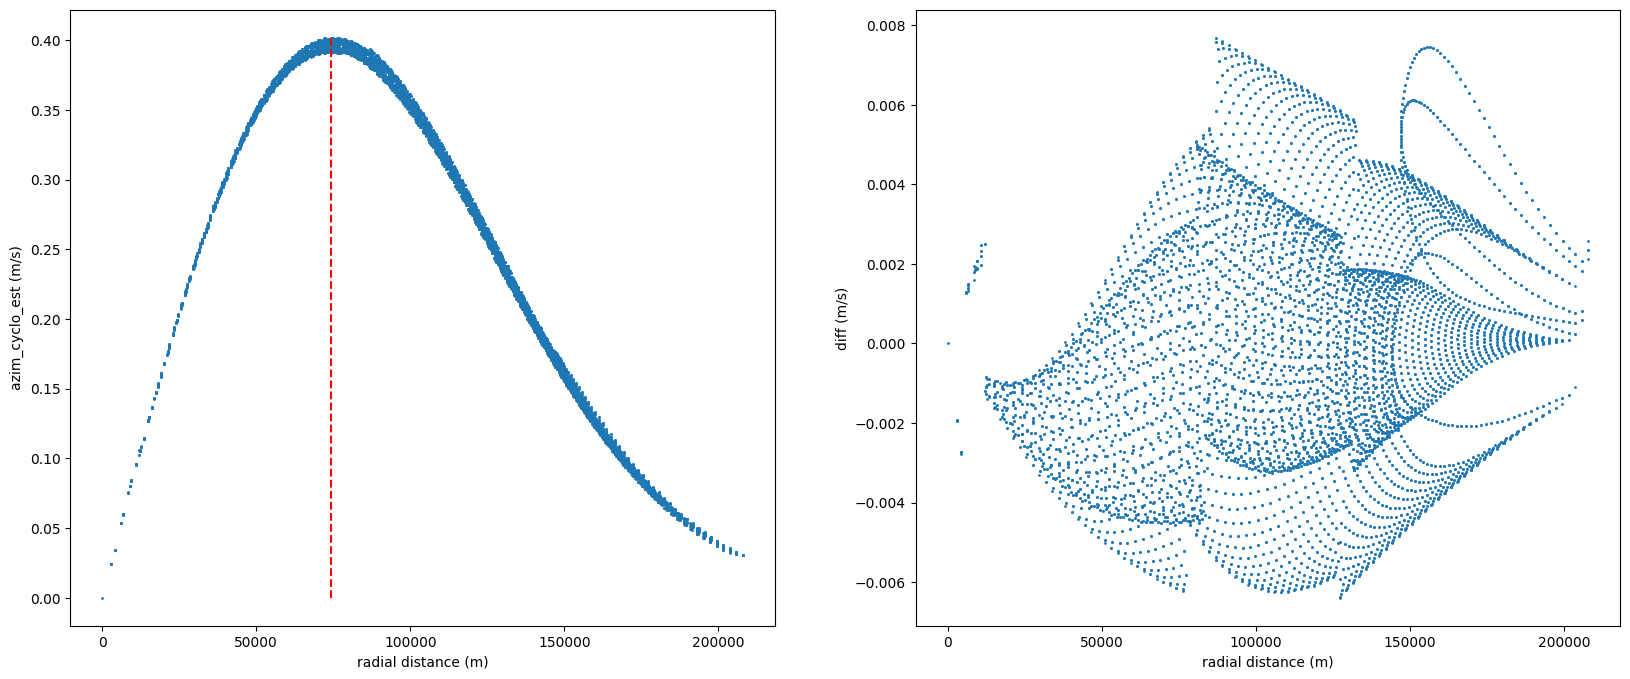

In [60]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_xlabel("radial distance (m)")
ax1.set_ylabel("azim_cyclo_est (m/s)")
ax1.scatter(R.flatten(), azim_cyclo_est.flatten(), s=1)
ax1.vlines(R.flatten()[np.abs(azim_cyclo_est).flatten().argmax()], 
           ymin=azim_cyclo_est.min(), ymax=azim_cyclo_est.max(), colors="r", linestyles="dashed")
ax2.set_xlabel("radial distance (m)")
ax2.set_ylabel("diff (m/s)")
ax2.scatter(R.flatten(), (azim_cyclo_est - azim_cyclo_magn).flatten(), s=1)
plt.show()